In [23]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets


In [24]:


def f(x, r):
    return r * x * (1 - x)


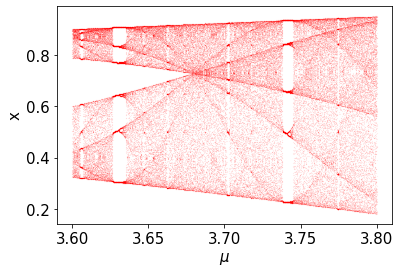

In [52]:

ys = []
rs = np.linspace(3.6, 3.8, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Figure 14.16.
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

plt.plot(ys[:, 0], ys[:, 1], 'r.', markersize=0.05)
plt.xlabel('$\mu$', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


In [26]:
def logistic_one(r,x0,N):
    x = x0
    ys=[]
    ys.append(x)
    for i in range(N):
        x = f(x, r)
        ys.append(x)

    return ys


def logist_plot(r,x0,N):
    plt.plot(logistic_one(r,x0,N),'x-')
    plt.ylim(0,1)

In [27]:
logist_plot(,0.5,10)

SyntaxError: invalid syntax (3314886535.py, line 1)

In [28]:
mylayout=Layout(width='10cm')
interact(logist_plot, r=widgets.FloatSlider(min=0.9, max=3.9, step=0.1, value=1., description='r:',
                                  continuous_update=False,layout=mylayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75],
                value=0.25,
                description='x0:',
                disabled=True,),
            N=widgets.IntSlider(min=10, max=400, step=10, value=20, description='N:',
                                  continuous_update=False,layout=mylayout,readout=True, readout_format='.1f')
             )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r:', layout=Layout(width='1…

<function __main__.logist_plot(r, x0, N)>

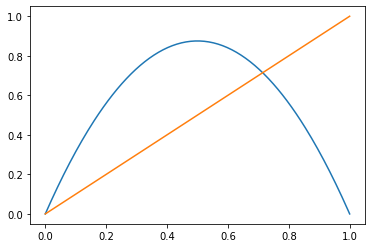

In [31]:
x = np.linspace(0, 1, 200)
plt.plot(x,f(x,3.5))
plt.plot(x,x)